# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
## 2. Load data

In [2]:
df = pd.read_csv('clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [3]:
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,0.000908,2.086294,99.530517,44.235794,2.086425,9.953056e+01,44.236702,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000,0


In [4]:
df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'var_year_price_off_peak_var', 'var_year_price_peak_var',
       'var_year_price_mid_peak_var', 'var_year_price_off_peak_fix',
       'var_year_price_peak_fix', 'var_year_price_mid_peak_fix',
       'var_year_price_off_peak', 'var_year_price_peak',
       'var_year_price_mid_peak', 'var_6m_price_off_peak_var',
       'var_6m_price_peak_var', 'var_6m_price_mid_peak_var',
       'var_6m_price_off_peak_fix', 'var_6m_price_peak_fix',
       'var_6m_price_mid_peak_fix', 'var_6m_p

---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [5]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [6]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


Now it is time to get creative and to conduct some of your own feature engineering! Have fun with it, explore different ideas and try to create as many as yo can!

In [7]:
price_df = pd.merge(diff, price_df, how = 'inner', on = 'id')

In [8]:
# FEATURE ENGINEERING ON CLIENT DATA

In [9]:
# Created a new feature for customer tenure
df['customer_tenure'] = (df['date_end'] - df['date_activ']).dt.days

# Created a new feature for average annual consumption
df['avg_annual_consumption'] = df['cons_12m'] / df['num_years_antig']

# Created a new feature for seasonal variation in consumption
df['seasonal_variation'] = abs(df['cons_12m'] - df['forecast_cons_12m'])

# Updated DataFrame
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,customer_tenure,avg_annual_consumption,seasonal_variation
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1,1096,0.000000,0.00
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,2566,776.666667,4470.05
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0,2192,90.666667,496.04
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,2192,264.000000,1343.96
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0,2245,737.500000,3979.25


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [11]:
# Number of years the client modified contract

df['contract_modification_interval'] = df.date_modif_prod.dt.year - df.date_activ.dt.year

# Number of years the client has been a customer
df['contract_interval'] = df.date_end.dt.year - df.date_activ.dt.year

In [12]:
df.head()


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,customer_tenure,avg_annual_consumption,seasonal_variation,contract_modification_interval,contract_interval
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,44.235794,2.086425,9.953056e+01,4.423670e+01,1,1096,0.000000,0.00,2,3
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,0.009485,1.217891e-03,0.000000e+00,0,2566,776.666667,4470.05,0,7
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000,0.000004,9.450150e-08,0.000000e+00,0,2192,90.666667,496.04,0,6
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,0.000003,0.000000e+00,0.000000e+00,0,2192,264.000000,1343.96,0,6
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000000,0.000011,2.896760e-06,4.860000e-10,0,2245,737.500000,3979.25,0,6


In [13]:
df.groupby('churn')['contract_modification_interval'].mean()

churn
0    1.888375
1    1.907681
Name: contract_modification_interval, dtype: float64

In [14]:
df.groupby('churn')['contract_interval'].mean()

churn
0    5.527338
1    5.112755
Name: contract_interval, dtype: float64

In [15]:
# The contract modification and number of years the client has been a customer does not seem to make a difference 
# for churn or not churned customers

In [16]:
# MERGING both client and price data set

merged_data = df.merge(price_df,on='id')
print('Total No of Clients in Price Dataset : ',price_df.id.nunique(),'\nTotal No of Clients in Client Dataset : ',df.id.nunique(),'\nTotal No of Clients after merging : ',merged_data.id.nunique())

Total No of Clients in Price Dataset :  16096 
Total No of Clients in Client Dataset :  14606 
Total No of Clients after merging :  14606


In [17]:
# Number of clients data missing 

16096 - 14606

# 1490 clients data is missing in the dataframe

1490

In [18]:
merged_data

# We have about 58 features and need to understand which featues are highly correlated and unnecessary

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,contract_interval,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,3,0.020057,3.700961,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,3,0.020057,3.700961,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,3,0.020057,3.700961,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,3,0.020057,3.700961,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,3,0.020057,3.700961,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175144,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,7,-0.004628,-0.000001,2015-08-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
175145,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,7,-0.004628,-0.000001,2015-09-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
175146,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,7,-0.004628,-0.000001,2015-10-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
175147,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,7,-0.004628,-0.000001,2015-11-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000


In [19]:
# CORRELATION PLOT

# To identify the variables that have high correlation with each other and with churn

# This data shows that there is no linear correlation with any features and churn while there are 
# a lot of features with high multicollinearity

/var/folders/8h/67zlqswd6nsfxgp6gvbcx7gc0000gn/T/ipykernel_54733/2334874929.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


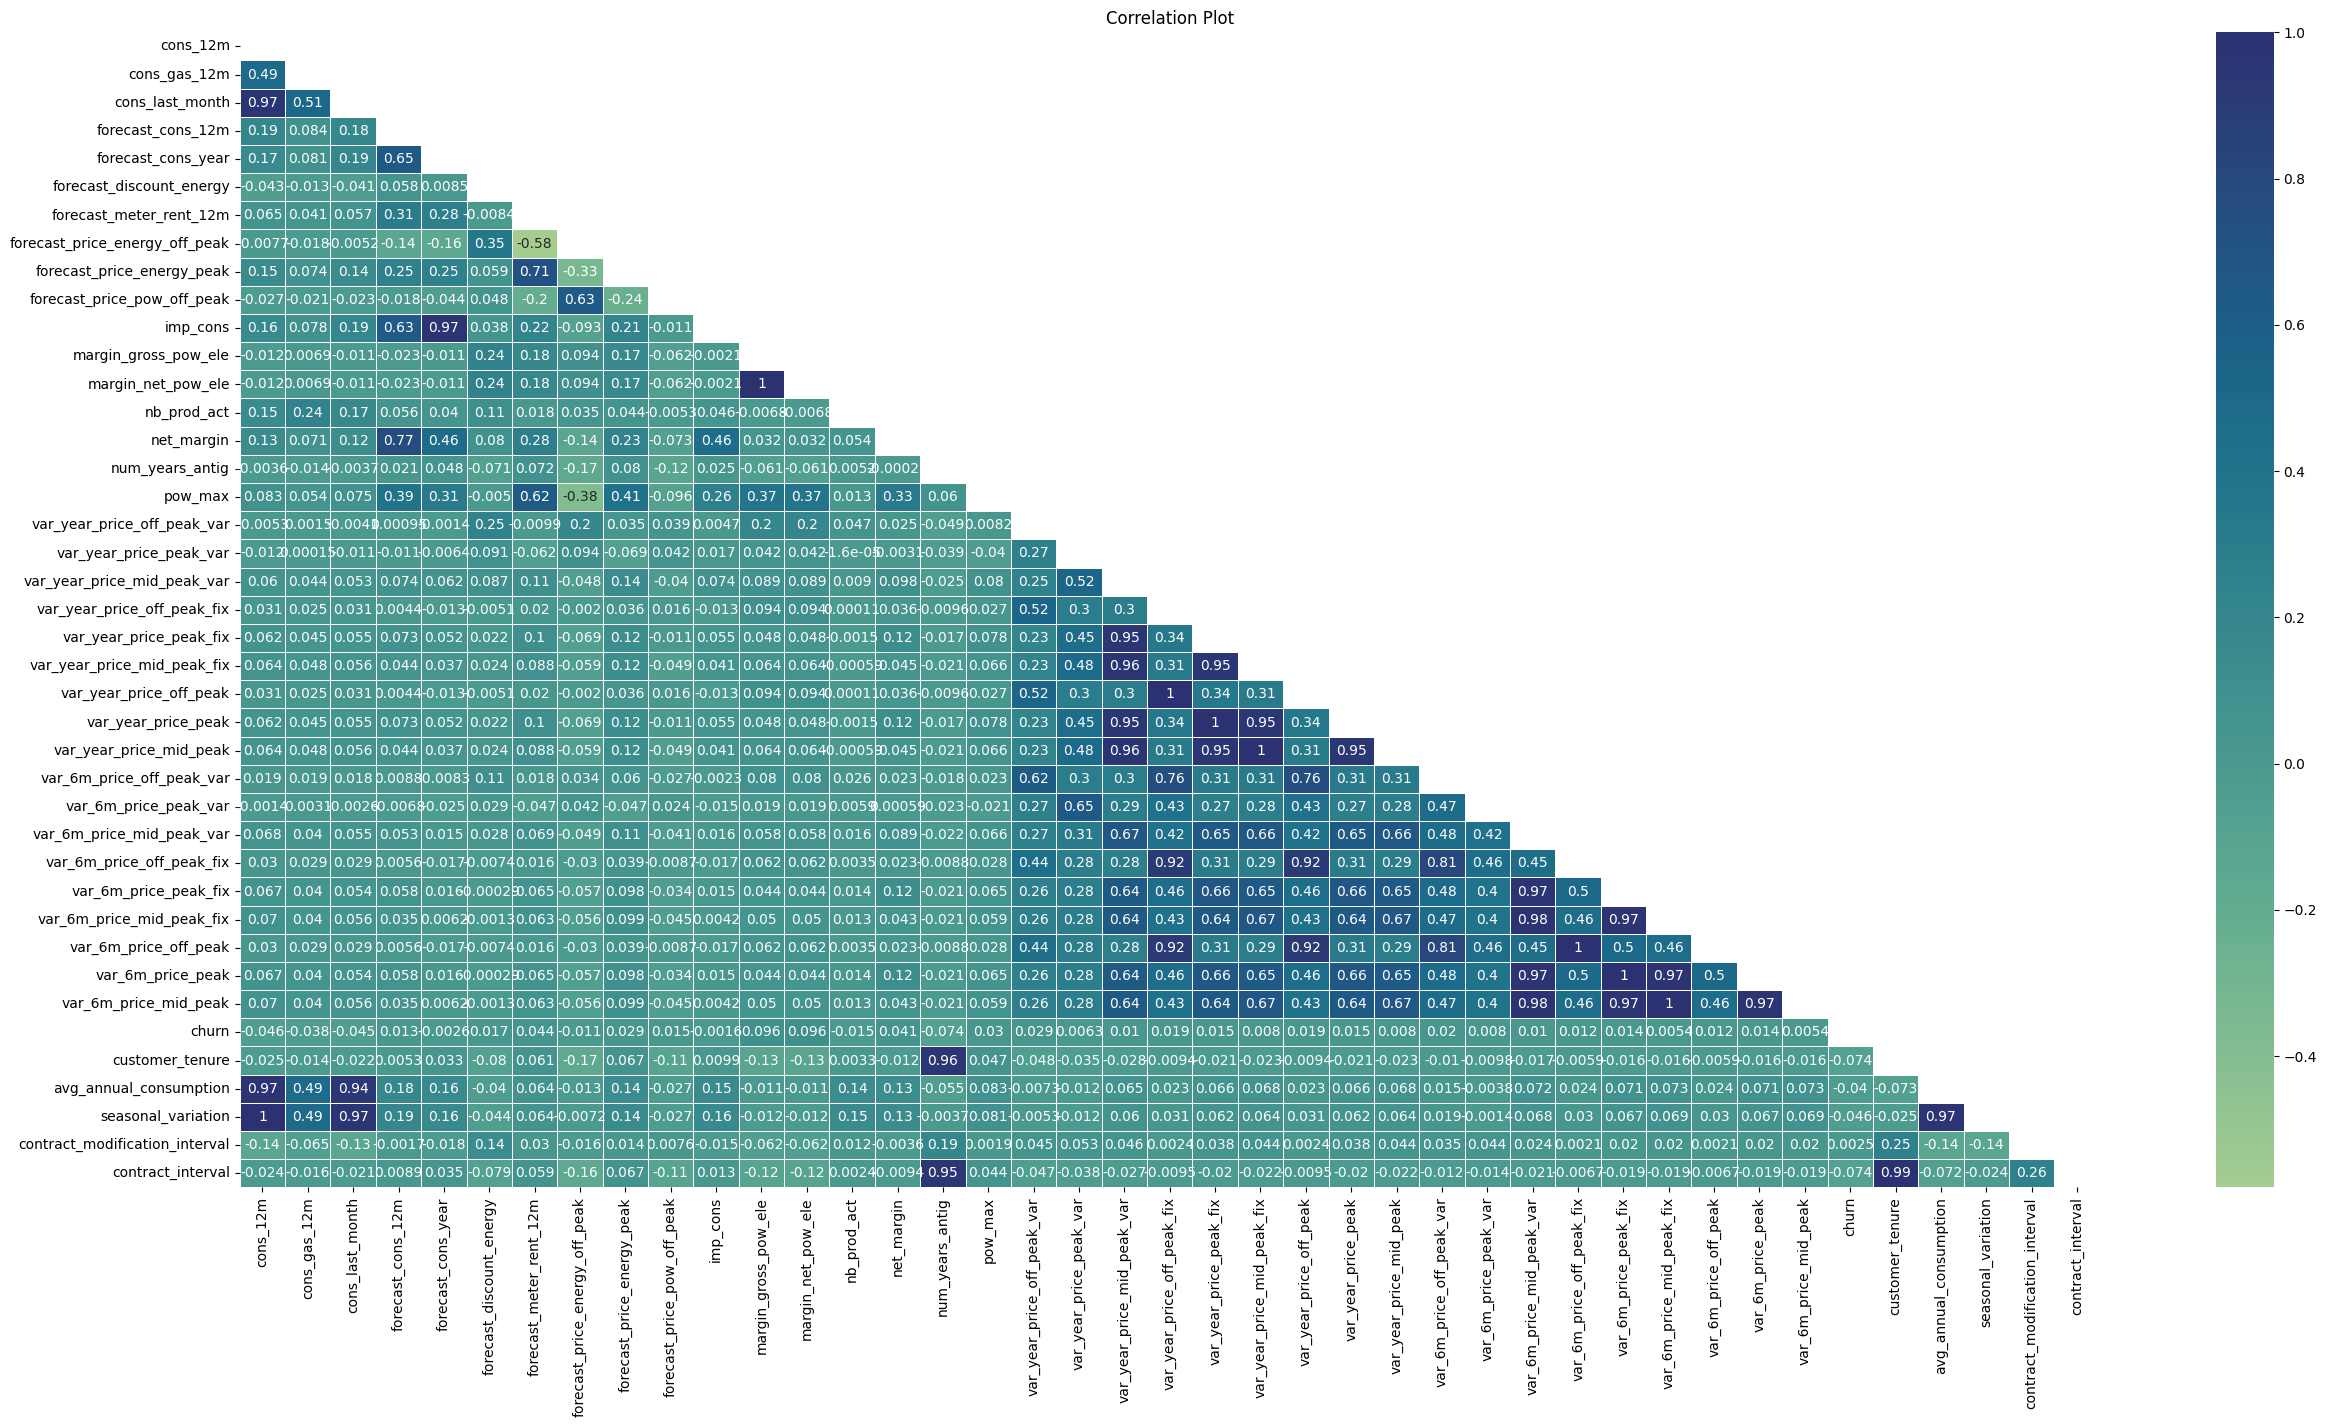

In [22]:
plt.figure(figsize=(30,15))
df_corr = df.corr()
mask = np.triu(np.ones_like(df_corr))
sns.heatmap(df_corr,annot=True,cmap="crest",linewidth=.5,mask=mask)
plt.title('Correlation Plot')
plt.show()

In [55]:
merged_data.drop([
    #Highly correlated columns
    'cons_last_month','forecast_cons_12m', 'forecast_cons_year','forecast_meter_rent_12m',
    'forecast_meter_rent_12m', 'forecast_price_energy_off_peak','forecast_price_energy_peak', 
    'forecast_price_pow_off_peak','margin_gross_pow_ele', 'nb_prod_act',
    'num_years_antig',
    #Unwanted Columns
    'id','date_activ','date_end','date_renewal','date_modif_prod',
],axis=1,inplace=True)

In [56]:
merged_data

,channel_sales,cons_12m,cons_gas_12m,forecast_discount_energy,has_gas,imp_cons,margin_net_pow_ele,net_margin,origin_up,pow_max,...,contract_interval,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0.0,t,0.0,25.44,678.99,lxidpiddsbxsbosboudacockeimpuepw,43.648,...,3,0.020057,3.700961,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0.0,t,0.0,25.44,678.99,lxidpiddsbxsbosboudacockeimpuepw,43.648,...,3,0.020057,3.700961,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0.0,t,0.0,25.44,678.99,lxidpiddsbxsbosboudacockeimpuepw,43.648,...,3,0.020057,3.700961,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0.0,t,0.0,25.44,678.99,lxidpiddsbxsbosboudacockeimpuepw,43.648,...,3,0.020057,3.700961,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0.0,t,0.0,25.44,678.99,lxidpiddsbxsbosboudacockeimpuepw,43.648,...,3,0.020057,3.700961,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175144,MISSING,8730,0,0.0,f,0.0,11.84,96.34,ldkssxwpmemidmecebumciepifcamkci,10.392,...,7,-0.004628,-0.000001,2015-08-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
175145,MISSING,8730,0,0.0,f,0.0,11.84,96.34,ldkssxwpmemidmecebumciepifcamkci,10.392,...,7,-0.004628,-0.000001,2015-09-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
175146,MISSING,8730,0,0.0,f,0.0,11.84,96.34,ldkssxwpmemidmecebumciepifcamkci,10.392,...,7,-0.004628,-0.000001,2015-10-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
175147,MISSING,8730,0,0.0,f,0.0,11.84,96.34,ldkssxwpmemidmecebumciepifcamkci,10.392,...,7,-0.004628,-0.000001,2015-11-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000


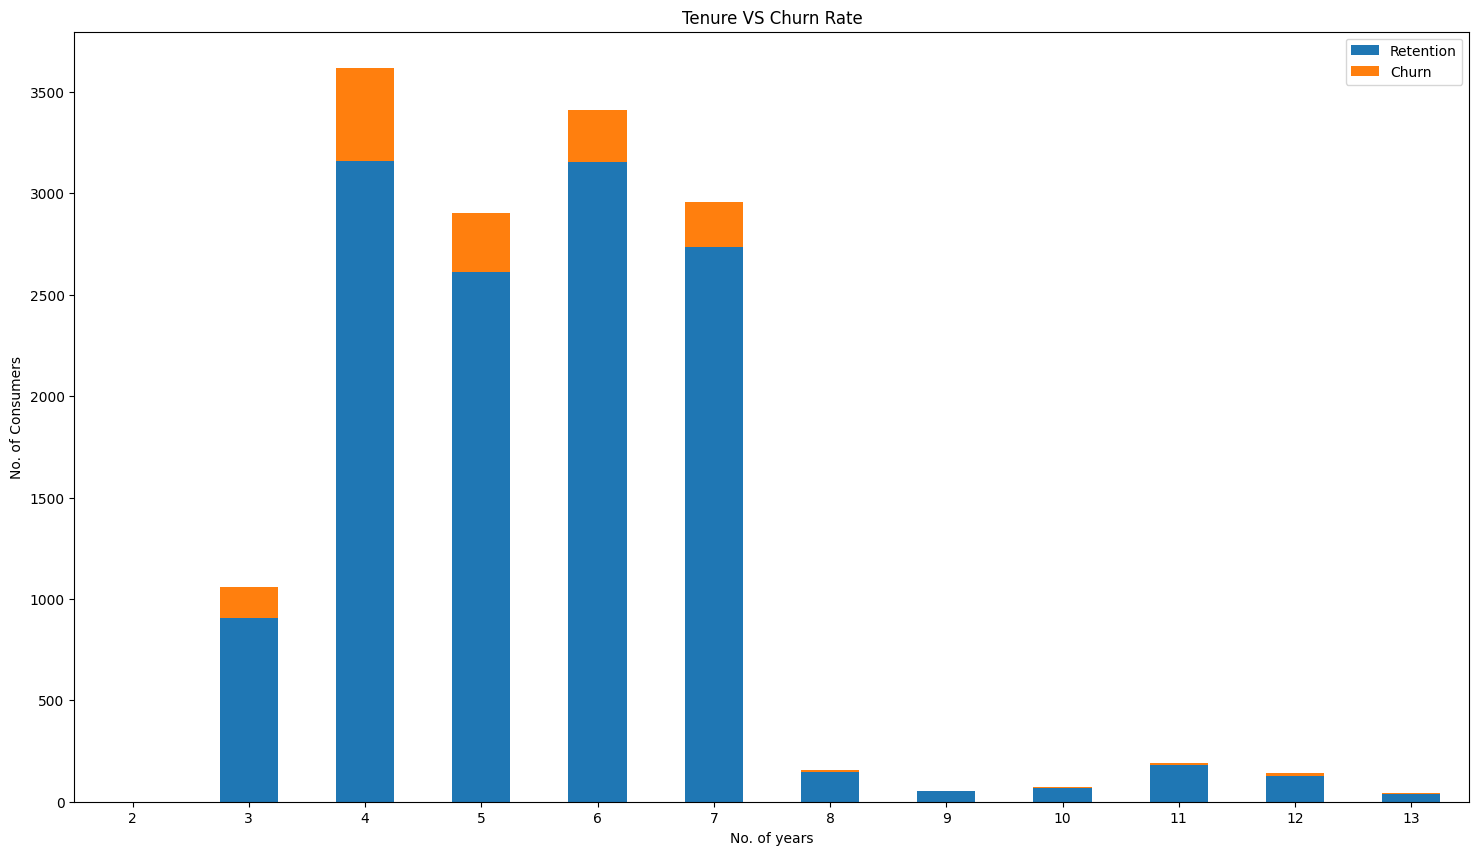

In [59]:
tenure = df[["contract_interval", "churn", "id"]].groupby(["contract_interval",
                                                                 "churn"])["id"].count().unstack(level=1)
tenure_percentage = (tenure.div(tenure.sum(axis=1), axis=0)*100)
tenure.plot(kind="bar",
 figsize=(18,10),
 stacked=True,
rot=0,
 title= "Tenure VS Churn Rate")
# Rename legend
plt.legend(["Retention", "Churn"], loc="upper right")
# Labels
plt.ylabel("No. of Consumers")
plt.xlabel("No. of years")
plt.show()

In [ ]:
# This shows that there is a higher churn rate in customers between 3-7 when compared to
# new customers or customers who have been around for over 8years

In [62]:
X.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'var_year_price_off_peak_var', 'var_year_price_peak_var',
       'var_year_price_mid_peak_var', 'var_year_price_off_peak_fix',
       'var_year_price_peak_fix', 'var_year_price_mid_peak_fix',
       'var_year_price_off_peak', 'var_year_price_peak',
       'var_year_price_mid_peak', 'var_6m_price_off_peak_var',
       'var_6m_price_peak_var', 'var_6m_price_mid_peak_var',
       'var_6m_price_off_peak_fix', 'var_6m_price_peak_fix',
       'var_6m_price_mid_peak_fix', 'var_6m_p

In [126]:
churn_df = df[df['churn'] == 1]
churn_df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,customer_tenure,avg_annual_consumption,seasonal_variation,contract_modification_interval,contract_interval
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,44.235794,2.086425,9.953056e+01,4.423670e+01,1,1096,0.000000,0.00,2,3
5,1aa498825382410b098937d65c4ec26d,usilxuppasemubllopkaafesmlibmsdf,8302,0,1998,2011-12-09,2016-12-09,2015-11-01,2015-12-10,796.94,...,0.000000,0.000010,4.240524e-06,0.000000e+00,1,1827,2075.500000,7505.06,4,5
6,7ab4bf4878d8f7661dfc20e9b8e18011,foosdfpfkusacimwkcsosbicdxkicaua,45097,0,0,2011-12-02,2016-12-02,2011-12-02,2015-12-03,8069.28,...,0.000000,0.000004,9.450150e-08,0.000000e+00,1,1827,11274.250000,37027.72,0,5
25,389bbbe70248fbeecdf9bb1bd0d1da04,foosdfpfkusacimwkcsosbicdxkicaua,3584,0,322,2010-11-17,2016-11-17,2010-11-17,2015-11-18,379.83,...,0.053237,0.073254,5.955412e-02,5.323674e-02,1,2192,716.800000,3204.17,0,6
30,44e826a55734d0ca5eeafcae0e991a75,foosdfpfkusacimwkcsosbicdxkicaua,324,0,0,2009-07-07,2016-07-07,2015-05-23,2015-07-09,8.32,...,0.000000,0.005270,0.000000e+00,0.000000e+00,1,2557,46.285714,315.68,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14587,1adf14d41e4c3bbb48635ada51ed3a83,foosdfpfkusacimwkcsosbicdxkicaua,2013,0,0,2011-11-14,2016-11-14,2014-02-17,2015-11-17,304.55,...,0.000000,0.790458,0.000000e+00,0.000000e+00,1,1827,503.250000,1708.45,3,5
14588,2610e546b6d546f724cb0397dca1a14e,usilxuppasemubllopkaafesmlibmsdf,5286,0,0,2013-01-09,2017-01-09,2015-11-18,2016-01-10,806.19,...,0.000000,0.000005,0.000000e+00,0.000000e+00,1,1461,1762.000000,4479.81,2,4
14593,c525fcb0860e5705d37743f5b5cadbfe,foosdfpfkusacimwkcsosbicdxkicaua,3909,0,155,2012-10-23,2016-11-12,2015-09-19,2015-11-13,327.17,...,0.000000,0.005275,0.000000e+00,0.000000e+00,1,1481,1303.000000,3581.83,3,4
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,0.000299,0.014948,5.684001e-03,2.987132e-04,1,1461,2407.666667,6591.31,0,4


In [127]:
non_churn_df = df[df['churn'] == 0]
non_churn_df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,customer_tenure,avg_annual_consumption,seasonal_variation,contract_modification_interval,contract_interval
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.0,0.009485,1.217891e-03,0.000000e+00,0,2566,776.666667,4470.05,0,7
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.0,0.000004,9.450150e-08,0.000000e+00,0,2192,90.666667,496.04,0,6
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.0,0.000003,0.000000e+00,0.000000e+00,0,2192,264.000000,1343.96,0,6
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.0,0.000011,2.896760e-06,4.860000e-10,0,2245,737.500000,3979.25,0,6
7,01495c955be7ec5e7f3203406785aae0,foosdfpfkusacimwkcsosbicdxkicaua,29552,0,1260,2010-04-21,2016-04-21,2010-04-21,2015-04-22,864.73,...,0.0,0.000011,2.896760e-06,4.860000e-10,0,2192,4925.333333,28687.27,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14599,46362cb1ad2fcdad347a6fa1bc1e5d4b,foosdfpfkusacimwkcsosbicdxkicaua,18163,3036,0,2010-01-26,2017-01-26,2015-11-17,2016-01-27,2663.82,...,0.0,0.000003,0.000000e+00,0.000000e+00,0,2557,3027.166667,15499.18,5,7
14600,c49217f16a06263e5381eaba94a67a8b,foosdfpfkusacimwkcsosbicdxkicaua,87146,0,11367,2013-02-08,2016-02-08,2013-02-08,2015-02-09,712.33,...,0.0,0.000011,2.896760e-06,4.860000e-10,0,1095,29048.666667,86433.67,0,3
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,0.0,0.000003,0.000000e+00,0.000000e+00,0,1445,8067.500000,27621.99,3,4
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,0.0,0.009485,1.217891e-03,0.000000e+00,0,1461,43.666667,111.66,0,4


# CONTRACT LENGTH

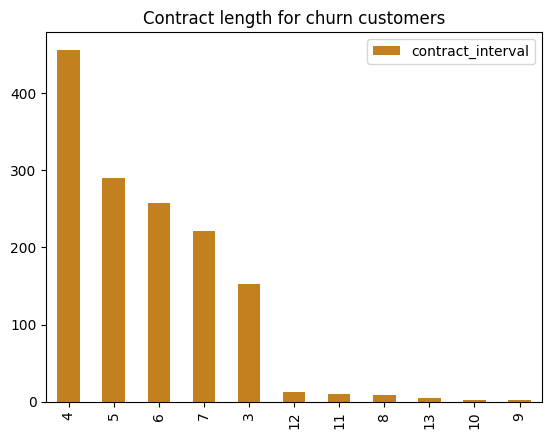

In [168]:



churn_contract = pd.DataFrame(churn_df.contract_interval.value_counts())
churn_contract.plot(kind = 'bar', color = '#c3801f')
plt.title("Contract length for churn customers")
plt.show()


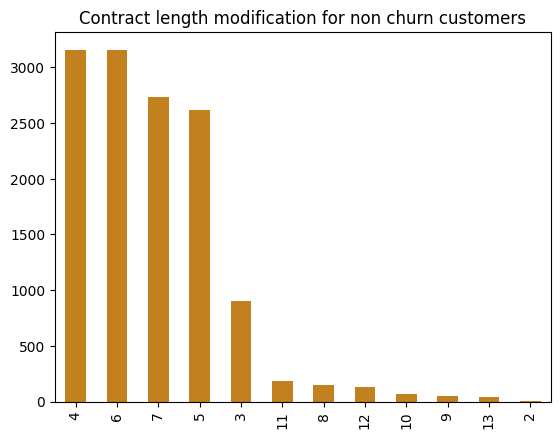

In [173]:
non_churn_contract = non_churn_df.contract_interval.value_counts()
non_churn_contract.plot(kind = 'bar', color = '#C3801F')
plt.title("Contract length for non churn customers")
plt.show()

# contract length modification


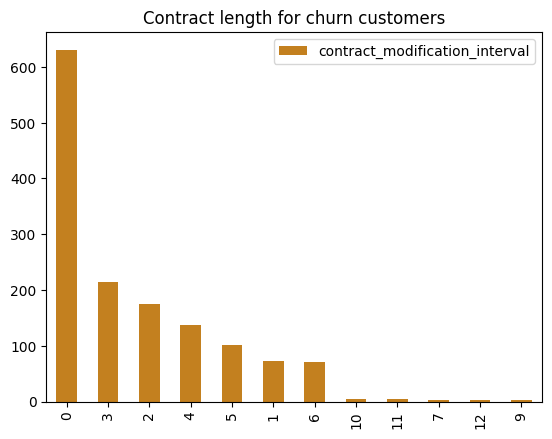

In [172]:

churn_contract_mod = pd.DataFrame(churn_df.contract_modification_interval.value_counts())
churn_contract_mod.plot(kind = 'bar', color = '#c3801f')
plt.title("Contract length modification for churn customers")
plt.show()

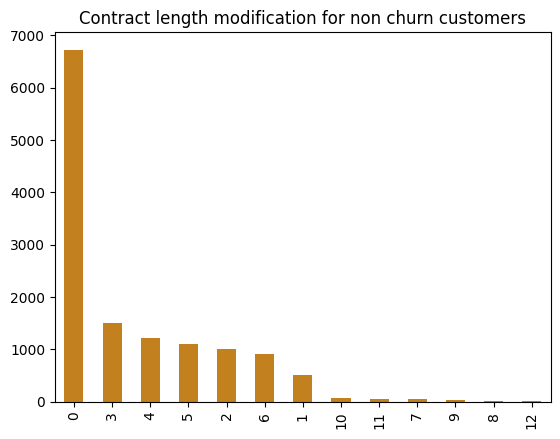

In [174]:
non_churn_contract_mod= non_churn_df.contract_modification_interval.value_counts()
non_churn_contract_mod.plot(kind = 'bar', color = '#C3801F')
plt.title("Contract length modification for non churn customers")
plt.show()